In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cognifyzintern1/Dataset .csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/kaggle/input/cognifyzintern1/Dataset .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


Determine the percentage of restaurants that offer table booking and online delivery

In [4]:
#Below we map the binary variables 'Has Online delivery' and 'Has Table booking' in the form of 0s and 1s by declaring "Yes" as 1 and "No" as 0
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1,'No': 0})
df['Has Table booking']= df['Has Table booking'].map({'Yes' : 1,'No' : 0})
#Now we calculate the required percentage and print it 
online_delivery = (df['Has Online delivery'].sum()/len(df))*100
table_booking = (df['Has Table booking'].sum()/len(df))*100
print(f"Percentage of restaurants having table booking : {table_booking}%")
print(f"Percentage of restaurants having online delivery:  {online_delivery}%")


Percentage of restaurants having table booking : 12.124384881164275%
Percentage of restaurants having online delivery:  25.662234321013504%


Compare the average ratings of restaurants with table booking and those without

In [5]:
#Below we store the average ratings of restaurants  
avg_rating_with_booking = df[df['Has Table booking']==True]['Aggregate rating'].mean()
avg_rating_without_booking = df[df['Has Table booking']==False]['Aggregate rating'].mean()
#Now we print the required ratings 
print(f"Average Rating with booking {avg_rating_with_booking}")
print(f"Averags Rating without booking {avg_rating_without_booking}")


Average Rating with booking 3.4419689119170984
Averags Rating without booking 2.559358989634219


Analyse the availability of online delivery among restaurants with different price ranges 

In [6]:
p_ranges = df['Price range'].unique()
for price in p_ranges:
    sb = df[df['Price range']==price]
    online_delivery_percent = (sb['Has Online delivery'].sum()/len(sb))*100
    print(f"Price range : {price},Online delivery percentage : {online_delivery_percent}%")
    

Price range : 3,Online delivery percentage : 29.19034090909091%
Price range : 4,Online delivery percentage : 9.044368600682594%
Price range : 2,Online delivery percentage : 41.310632830067455%
Price range : 1,Online delivery percentage : 15.774077407740775%


Determine the most common price range among all restaurants

In [7]:
most_common_range = df['Price range'].mode()[0]
print(f"The most common price range among all restaurants is : {most_common_range}")

The most common price range among all restaurants is : 1


Calculate the average rating for each price range

In [8]:
#We create a list to store the average ratings for each range
avg_rating = df.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("Average ratings for each price range : ")
print(avg_rating)

Average ratings for each price range : 
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


Identify the color that represents the highest average rating among different price ranges

The color which represents the highest average rating is 4


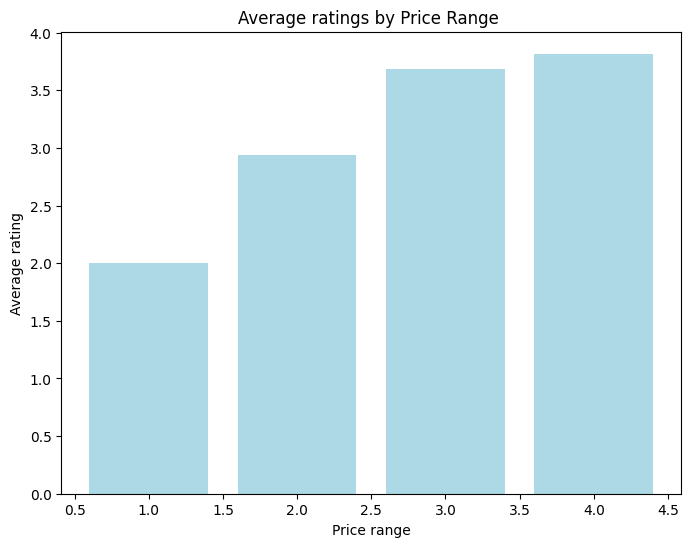

In [9]:
max_rating = avg_rating['Aggregate rating'].max()
color_highest = avg_rating.loc[avg_rating['Aggregate rating']==max_rating,'Price range'].values[0]
print(f"The color which represents the highest average rating is {color_highest}") 
plt.figure(figsize = (8,6))
plt.bar(avg_rating['Price range'],avg_rating['Aggregate rating'],color= 'lightblue')
plt.xlabel('Price range')
plt.ylabel('Average rating')
plt.title('Average ratings by Price Range ')
plt.show()

Extract additional features from the existing columns such as the length of the restaraunt name or address 

In [10]:
df['Restaraunt Name Length']= df['Restaurant Name'].apply(lambda x : len(x))
df['Address Length']= df['Address'].apply(lambda x : len(x))

Create new features like "Has Table Booking" and "Has Online Delivery" by encoding categorical variables 

In [11]:
lab_enc= LabelEncoder()
df['Has Table Booking Encoded']= lab_enc.fit_transform(df['Has Table booking'])
df['Has Online Delivery Encoded'] = lab_enc.fit_transform(df['Has Online delivery'])
#Viewing the results of extracting address length and restaurant name length and of adding additional columns by encoding variables
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 